In [86]:
# Importanto a biblioteca pandas
import pandas as pd, matplotlib.pyplot as plt



In [48]:
# Leitura dos arquivos
# Os arquivos foram disponibilizados na aula, fiz opção por fazer upload dos arquivos no google colab 
# e depois carregá-los diretamente por aqui por conta da praticidade

df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [49]:
# Juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [50]:
df["Cidade"].unique()

array(['Aracaju', 'Fortaleza', 'Natal', 'Recife', 'Salvador'],
      dtype=object)

In [51]:
# Verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [52]:
# Alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [53]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [54]:
#Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace = True)

In [55]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [56]:
# As bases de dados foram disponibilizadas sem a presença de valores nulos,
# o comando abaixo substituiria valores nulos por zero
df["Vendas"].fillna(0,inplace=True)

In [57]:
# As bases de dados foram disponibilizadas sem a presença de valores nulos,
# o comando abaixo excluiria as linhas com valores
df.dropna(inplace = True)

In [58]:
# As bases de dados foram disponibilizadas sem a presença de valores nulos,
# o comando abaixo excluiria as linhas com valores com base somente
# na coluna Vendas
df.dropna(subset=["Vendas"], inplace=True)

In [59]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

In [60]:
#Criando novas colunas
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [61]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [62]:
df["Receitas/Vendas"] = df["Receita"] / df["Vendas"]
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [63]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [64]:
#Retornando a menor receita
df["Receita"].min()

3.34

In [65]:
#nlargest -> as três maiores receitas
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [66]:
#nsmallest -> as três menores receitas
df.nsmallest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [67]:
# Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [68]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum().nlargest(3)

Cidade
Natal      167227.52
Recife      51936.51
Aracaju     48748.25
Name: Receita, dtype: float64

In [69]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


In [70]:
#Ordenando o conjunto de dados
df.groupby("Cidade")["Receita"].sum().sort_values(ascending=False)

Cidade
Natal        167227.52
Recife        51936.51
Aracaju       48748.25
Salvador      40596.73
Fortaleza     37913.97
Name: Receita, dtype: float64

In [71]:
#Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [72]:
df.dtypes

Cidade              object
Data                 int64
Vendas             float64
LojaID              object
Qtde                 int64
Receita            float64
Receitas/Vendas    float64
dtype: object

In [73]:
#transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])
df.dtypes

Cidade                     object
Data               datetime64[ns]
Vendas                    float64
LojaID                     object
Qtde                        int64
Receita                   float64
Receitas/Vendas           float64
dtype: object

In [74]:
#Agrupamento por ano
df.groupby(["Cidade",df["Data"].dt.year])["Receita"].sum()

Cidade     Data
Aracaju    2018    46276.29
           2019     2471.96
Fortaleza  2019    37913.97
Natal      2018    71750.00
           2019    95477.52
Recife     2019    51936.51
Salvador   2018      150.24
           2019    40446.49
Name: Receita, dtype: float64

In [75]:
#Criando uma nova coluna com o ano
df["Ano_Vend"] = df["Data"].dt.year


In [76]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_Vend
125,Recife,2019-03-02,37.60,983,4,150.40,4.0,2019
167,Salvador,2019-01-02,36.42,1037,1,36.42,1.0,2019
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0,2018
16,Aracaju,2018-01-01,37.68,1522,10,376.80,10.0,2018
24,Salvador,2019-01-01,15.60,1034,2,31.20,2.0,2019


In [77]:
#Extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [78]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_Vend,mes_venda,dia_venda
100,Recife,2019-01-01,35.11,982,4,140.44,4.0,2019,1,1
127,Recife,2019-03-02,39.56,982,8,316.48,8.0,2019,3,2
27,Salvador,2019-01-01,145.79,1034,1,145.79,1.0,2019,1,1
21,Salvador,2019-01-01,39.72,1035,3,119.16,3.0,2019,1,1
200,Salvador,2019-01-02,41.06,1035,1,41.06,1.0,2019,1,2


In [79]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [80]:
#Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [81]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_Vend,mes_venda,dia_venda,diferenca_dias
39,Fortaleza,2019-01-01,176.51,1005,1,176.51,1.0,2019,1,1,365 days
9,Fortaleza,2019-01-01,11.17,1002,6,67.02,6.0,2019,1,1,365 days
103,Fortaleza,2019-01-01,142.57,1002,3,427.71,3.0,2019,1,1,365 days
87,Recife,2019-01-01,210.06,983,4,840.24,4.0,2019,1,1,365 days
142,Salvador,2019-01-02,7.12,1034,1,7.12,1.0,2019,1,2,366 days


In [82]:
#Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [83]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_Vend,mes_venda,dia_venda,diferenca_dias,trimestre_venda
44,Recife,2019-01-01,142.21,983,8,1137.68,8.0,2019,1,1,365 days,1
114,Fortaleza,2019-03-02,16.82,983,4,67.28,4.0,2019,3,2,425 days,1
131,Fortaleza,2019-03-02,139.07,982,6,834.42,6.0,2019,3,2,425 days,1
2,Natal,2019-03-11,308.00,852,3,924.00,3.0,2019,3,11,434 days,1
113,Fortaleza,2019-03-02,38.63,980,2,77.26,2.0,2019,3,2,425 days,1


In [84]:
# Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month ==3)]
vendas_marco_19.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receitas/Vendas,Ano_Vend,mes_venda,dia_venda,diferenca_dias,trimestre_venda
127,Salvador,2019-03-02,240.61,1035,3,721.83,3.0,2019,3,2,425 days,1
114,Fortaleza,2019-03-02,16.82,983,4,67.28,4.0,2019,3,2,425 days,1
45,Natal,2019-03-11,431.00,852,3,1293.00,3.0,2019,3,11,434 days,1
113,Fortaleza,2019-03-02,38.63,980,2,77.26,2.0,2019,3,2,425 days,1
111,Recife,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1


In [93]:
# Alterando o estilo
plt.style.use("fivethirtyeight")

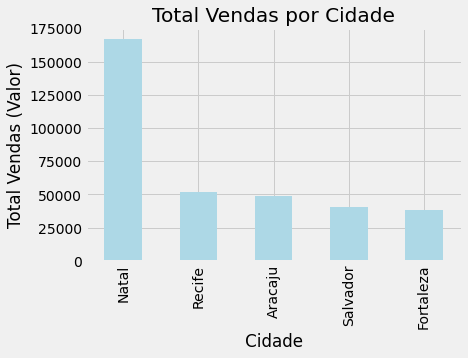

In [150]:
# Gráfico de barras horizontais
df.groupby("Cidade")["Receita"].sum().sort_values(ascending=False).plot.bar(title = "Total Vendas por Cidade", color = "lightblue")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas (Valor)");

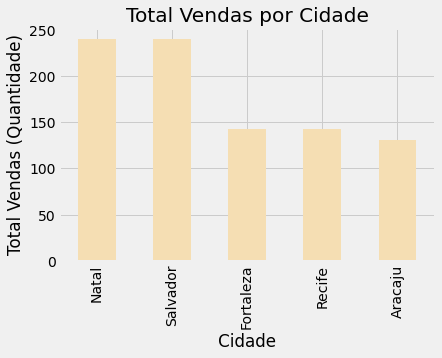

In [116]:
# Gráfico de barras horizontais
df["Cidade"].value_counts().plot.bar(title = "Total Vendas por Cidade",color = "wheat")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas (Quantidade)");

Avaliando tanto volume de vendas e receita por cidade, chama atenção o fato de que Natal tem maior receita e também maior quantidade de vendas. Por outro lado, Salvador possui a segunda menor receita porém com um volume de vendas próximo ao de Natal. Isso nos instiga a querer entender um pouco mais das características dos produtos em estudo.

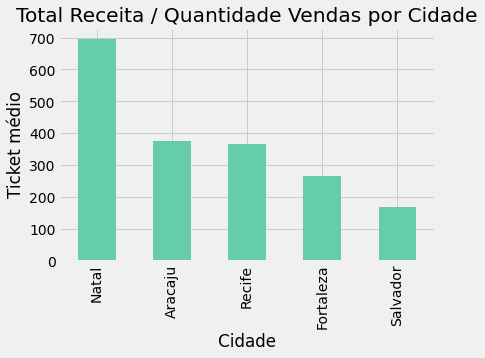

In [154]:
# Ticket médio por cidade
# Para o calculo correto do ticket médio tique que usar .groupby.size() ao invés values_counts, desta maneira consegui cuidar
# que ambas tabelas (contagem de valores e soma de valores) estivessem na mesma ordem para realizar o operação de divisão de maneira adequada
(df.sort_values("Cidade").groupby("Cidade")["Receita"].sum() / df.sort_values("Cidade").groupby("Cidade").size()).sort_values(ascending=False).plot.bar(title = "Total Receita / Quantidade Vendas por Cidade",color = "mediumaquamarine")
plt.xlabel("Cidade")
plt.ylabel("Ticket médio");




Conforme suspeita nas etapas anteriores, Salvador possui um grande volume de vendas porém o valor de cada venda é relativamente baixo, fazendo com que o seu ticket médio seja o menor dentre as cidades da base de dados em questão.